In [1]:
%matplotlib notebook

In this example, we are going to query any thing that have been observed with a seeing lower than 2arcsec between the 1st of May 2018 and the 1st of June 2018.

In [2]:
# Julian dates:
from astropy import time
jd_1may18 = time.Time("2018-05-01").jd # 2458239.5
jd_1june18 = time.Time("2018-06-01").jd # 2458270.5
print(jd_1may18,jd_1june18)

2458239.5 2458270.5


In [3]:
from ztfquery import query
zquery = query.ZTFQuery()


# Do the Query to see what exists
zquery.load_metadata(sql_query="seeing<2 and obsjd BETWEEN 2458239.5 AND 2458270.5")

In [5]:
zquery.metatable

,ra,dec,infobits,field,ccdid,qid,rcid,fid,filtercode,pid,...,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4,ipac_pub_date,ipac_gid
0,190.490312,39.224180,0,716,7,3,26,1,zg,488221712615,...,191.040285,39.664754,189.917967,39.647232,189.947574,38.781365,191.055739,38.798404,NaN,2
1,208.837252,39.234777,0,718,7,4,27,1,zg,488223152715,...,209.394653,39.669722,208.271954,39.663637,208.286738,38.797280,209.395240,38.803456,NaN,2
2,207.720906,39.223317,0,718,7,3,26,1,zg,488223152615,...,208.271223,39.663591,207.148953,39.646636,207.177826,38.780739,208.285989,38.797240,NaN,2
3,216.334950,39.224039,0,719,7,3,26,1,zg,488237922615,...,216.885499,39.664158,215.763157,39.647531,215.791667,38.781622,216.899875,38.797864,NaN,2
4,217.451325,39.235217,0,719,7,4,27,1,zg,488237922715,...,218.008875,39.670025,216.886228,39.664168,216.900577,38.797858,218.009149,38.803777,NaN,2
5,207.720368,39.225033,0,718,7,3,26,1,zg,488238402615,...,208.270692,39.665294,207.148395,39.648338,207.177279,38.782456,208.285484,38.798961,NaN,2
6,208.836732,39.236486,0,718,7,4,27,1,zg,488238402715,...,209.394139,39.671418,208.271410,39.665361,208.286221,38.799003,209.394724,38.805173,NaN,2
7,199.104582,39.225683,0,717,7,3,26,1,zg,488240782615,...,199.654694,39.666106,198.532345,39.648853,198.561668,38.782963,199.669813,38.799794,NaN,2
8,200.220927,39.237423,0,717,7,4,27,1,zg,488240782715,...,200.778090,39.672481,199.655454,39.666119,199.670584,38.799794,200.779106,38.806256,NaN,2
9,213.772152,46.435327,0,758,7,4,27,1,zg,488241292715,...,214.398754,46.870575,213.134766,46.863087,213.155539,45.996794,214.399186,46.004273,NaN,2


<IPython.core.display.Javascript object>


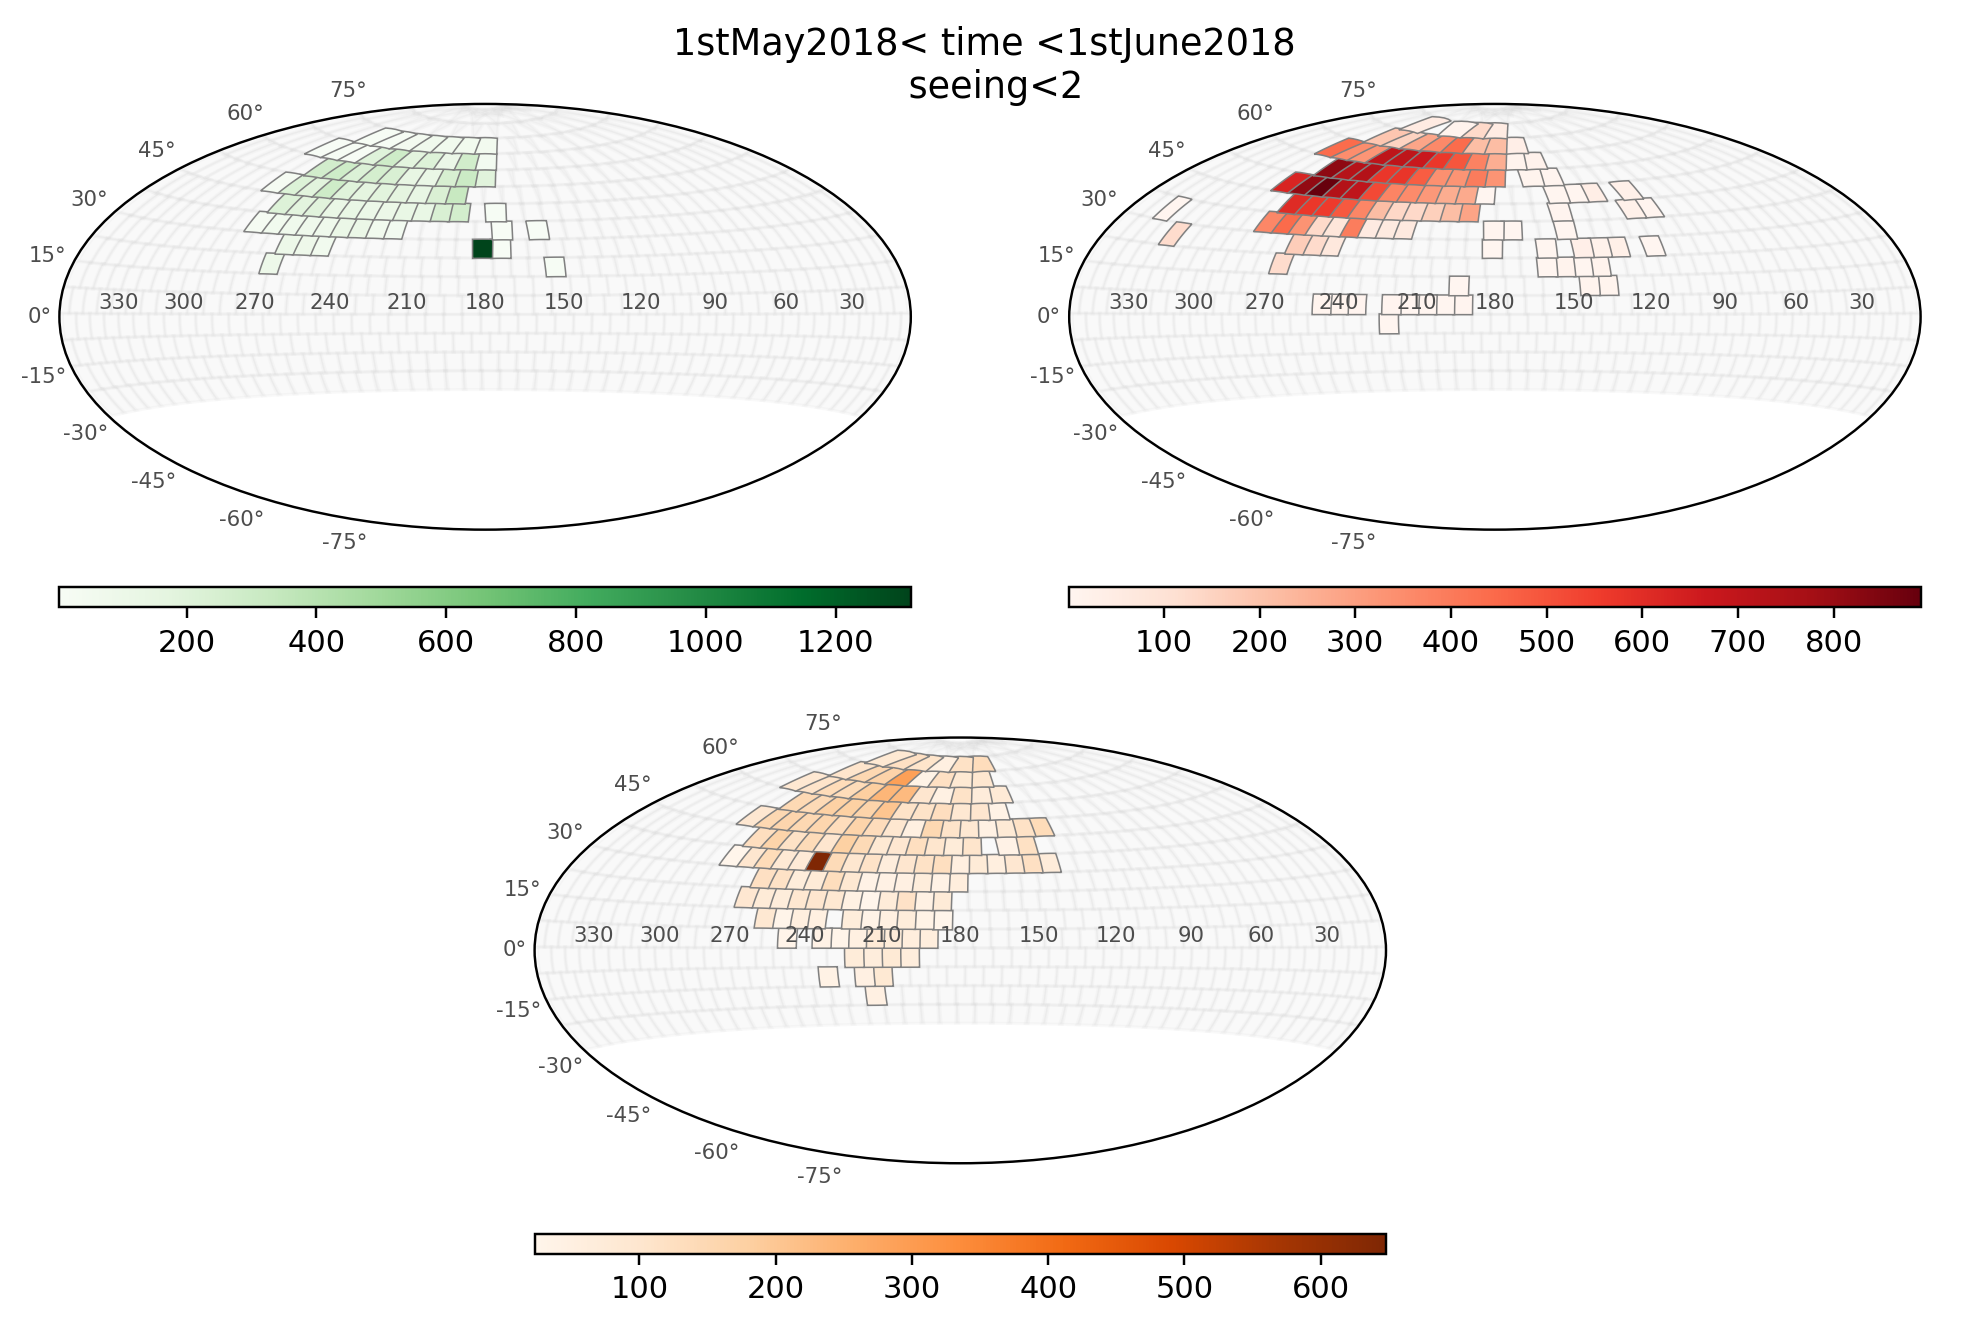

In [7]:
fig = zquery.show_gri_fields(title="1stMay2018< time <1stJune2018 \n seeing<2", grid="main")

In [8]:
fig.savefig("/Users/mrigault/Libraries/ztfquery/examples/figures/seeing_lower2_inMay.png", dpi=250)

# Average `value` using a field

`value` could be anything within the data DataFrame (metatable or data depending on your object see `_data`)

### Case of Airmass

<IPython.core.display.Javascript object>


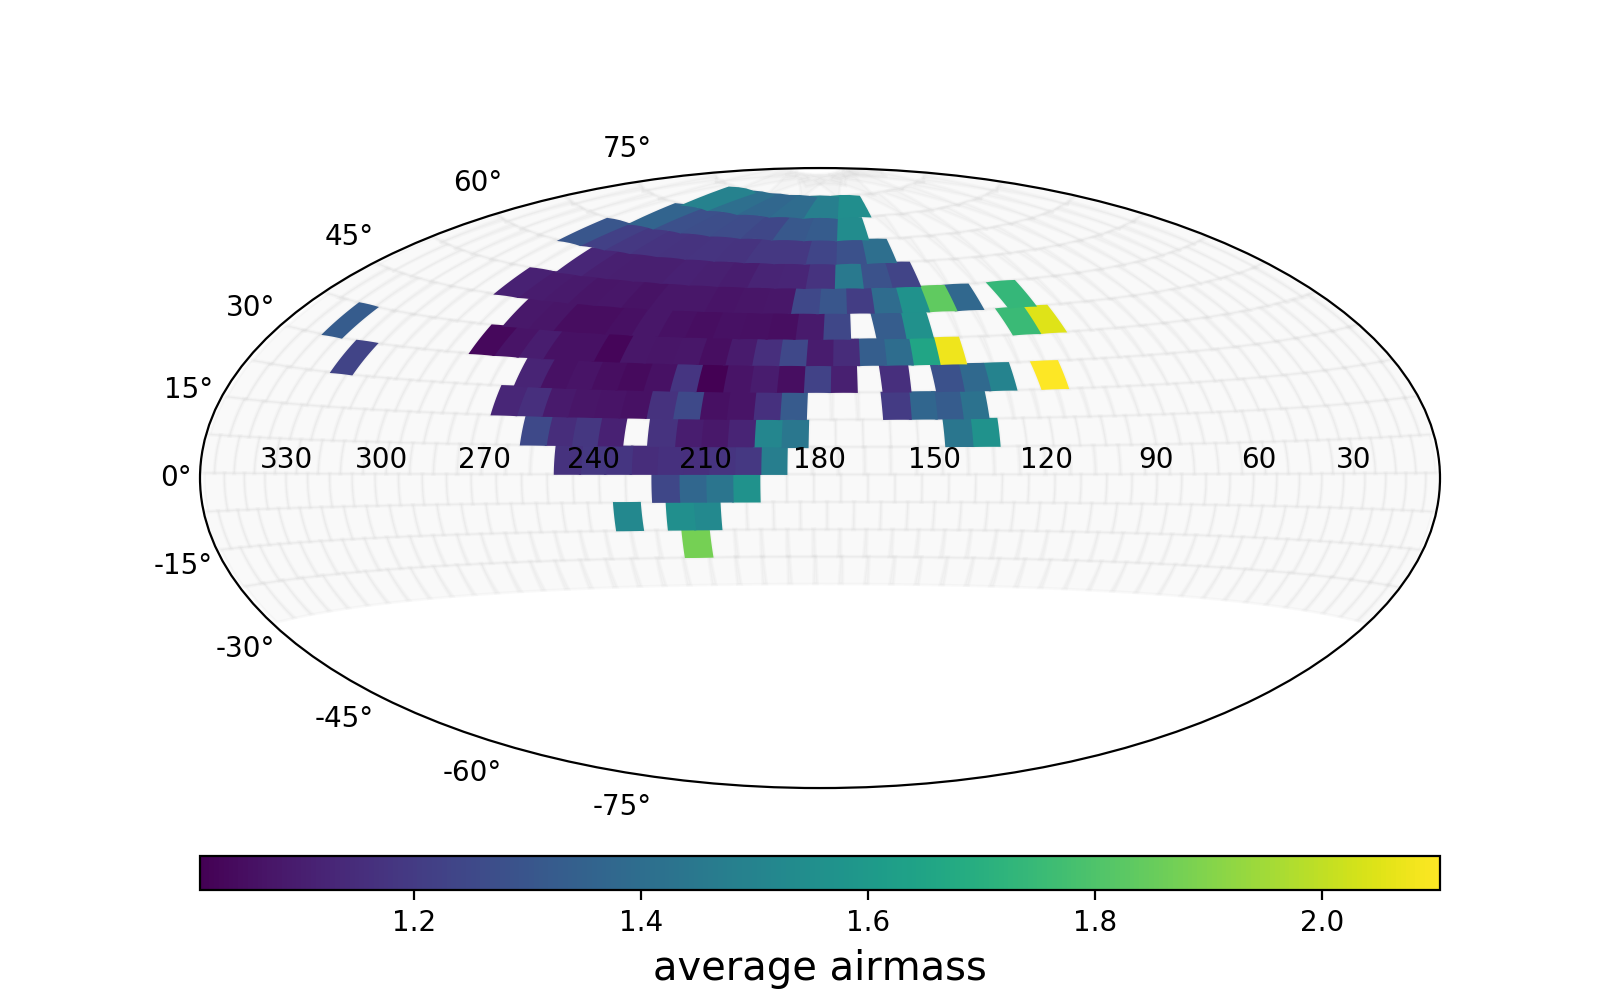

In [10]:
field_airmass = zquery.get_field_average_value("airmass", grid="main")

zquery.show_fields(field_airmass, clabel="average airmass")

### Case of RA

<IPython.core.display.Javascript object>


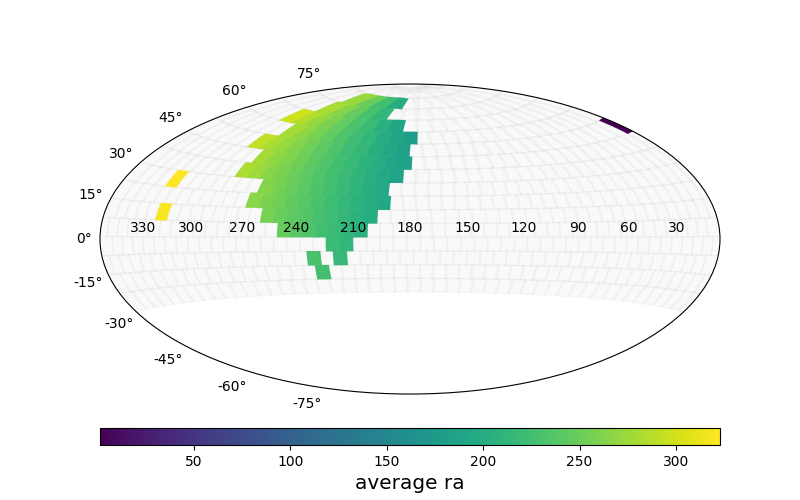

In [8]:
field_airmass = zquery.get_field_average_value("ra", grid="main")

zquery.show_fields(field_airmass, clabel="average ra")

In [9]:
# list of value in this object
zquery.metatable.columns

Index(['ra', 'dec', 'infobits', 'field', 'ccdid', 'qid', 'rcid', 'fid',
       'filtercode', 'pid', 'nid', 'expid', 'itid', 'imgtype', 'imgtypecode',
       'obsdate', 'obsjd', 'exptime', 'filefracday', 'seeing', 'airmass',
       'moonillf', 'moonesb', 'maglimit', 'crpix1', 'crpix2', 'crval1',
       'crval2', 'cd11', 'cd12', 'cd21', 'cd22', 'ra1', 'dec1', 'ra2', 'dec2',
       'ra3', 'dec3', 'ra4', 'dec4', 'ipac_pub_date', 'ipac_gid'],
      dtype='object')

# Any Dictionary you want

<IPython.core.display.Javascript object>


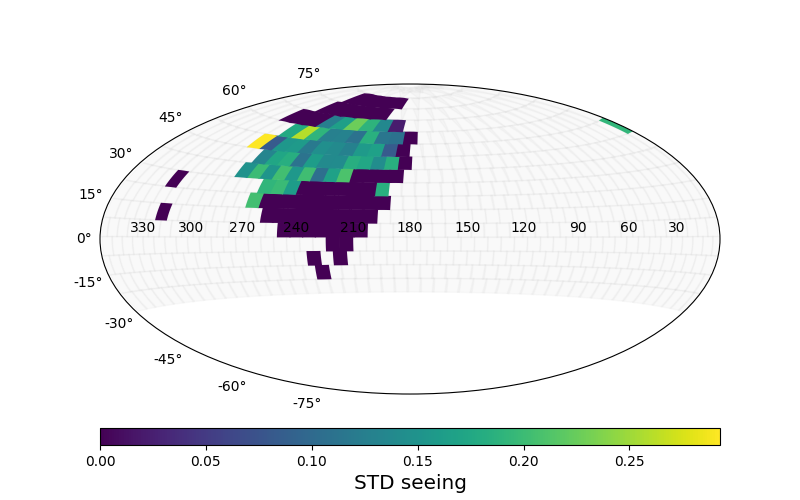

In [10]:
field_std_seeing = {f_: np.nanstd(zquery._data[np.in1d(zquery._data["field"], f_)]["seeing"])
                    for f_ in zquery.get_observed_fields(grid="main")}

zquery.show_fields(field_std_seeing, clabel="STD seeing")

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [ ]:
zquery.download_data("psfcat.fits", show_progress=False)